# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
api_key = weather_api_key

# Define units of measurement for temp
temp_units = "imperial"

# Citipy used to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_file = "cities.csv"
cities_new = pd.read_csv(cities_file)
cities_new.head(10)

url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[0]

'tasiilaq'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Lists for new dataframe
City_one = []
Cloudiness = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
Country = []

# Setting the count
count_one = 0
set_one = 1

# City_API_endpoint = "http://api.openweathermap.org/data/2.5/weather?q="
# City = "Nairobi"
# Country = ",KE,"
# join_key = "&appid=" + "24a28e84879c0723de4182ce4313653b"
# units = "&units=metric"

# current_city_weather = City_API_endpoint + City + Country + join_key + units
# print(current_city_weather)
      
# Looping through the data
#for city in cities:
    


In [8]:
# Print start of data retrieval
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            City_one.append(city)
        else:
            count_one += 1
            City_one.append(city)
        # Wait
        time.sleep(1)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ponta delgada
City not found. Skipping...
Processing Record 9 of Set 1 | baghmara
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | poum
Processing Record 13 of Set 1 | shelburne
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | oyon
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kavaratti
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | chake chake
Processing Record 22 of Set 1 | amapa
Processing Record

Processing Record 39 of Set 4 | fort morgan
Processing Record 40 of Set 4 | lac-megantic
Processing Record 41 of Set 4 | bethanien
Processing Record 42 of Set 4 | mogadishu
Processing Record 43 of Set 4 | novyy buyan
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | dobson
Processing Record 46 of Set 4 | papara
Processing Record 47 of Set 4 | changtu
Processing Record 48 of Set 4 | qaanaaq
Processing Record 49 of Set 4 | klyuchi
Processing Record 1 of Set 5 | imeni poliny osipenko
Processing Record 2 of Set 5 | nicoya
Processing Record 3 of Set 5 | roebourne
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | manadhoo
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | rundu
Processing Record 9 of Set 5 | bantry
Processing Record 10 of Set 5 | svetlyy
City not found. Skipping...
Processing Record 11 of Set 5 | safford
Processing Record 12 of Set 5 | cervo
Processing Record 13 of Set 5 | os

Processing Record 31 of Set 8 | susangerd
Processing Record 32 of Set 8 | sorland
Processing Record 33 of Set 8 | saveh
Processing Record 34 of Set 8 | mookane
Processing Record 35 of Set 8 | dhidhdhoo
Processing Record 36 of Set 8 | nizhniy kuranakh
City not found. Skipping...
Processing Record 37 of Set 8 | maraa
Processing Record 38 of Set 8 | krasnoufimsk
Processing Record 39 of Set 8 | nyuksenitsa
Processing Record 40 of Set 8 | lamesa
Processing Record 41 of Set 8 | ancud
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | cornwall
Processing Record 44 of Set 8 | qingquan
Processing Record 45 of Set 8 | puerto del rosario
Processing Record 46 of Set 8 | olinda
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | port hardy
Processing Record 49 of Set 8 | tamandare
Processing Record 1 of Set 9 | galesong
Processing Record 2 of Set 9 | komsomolskiy
Processing Record 3 of Set 9 | clyde river
Processing Record 4 of Set 9 | inhambane
Processing Rec

Processing Record 22 of Set 12 | tautira
Processing Record 23 of Set 12 | liverpool
Processing Record 24 of Set 12 | kota
Processing Record 25 of Set 12 | semenivka
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | merignac
Processing Record 28 of Set 12 | coos bay
City not found. Skipping...
Processing Record 29 of Set 12 | jalpa
Processing Record 30 of Set 12 | tiznit


In [9]:
# Convert raw data to dataframe, export city data into a CSV and display dataframe
weather_dictionary = {
    "City":City_one,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date
}


In [10]:
# Creating the dataframe
weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,28.40,93,75,18.41,GL,1620782037
1,mount gambier,53.6597,-1.8537,43.00,96,56,2.33,GB,1620782608
2,alice springs,27.7523,-98.0697,84.20,78,40,14.97,US,1620782609
3,cidreira,-30.1811,-50.2056,58.33,71,100,8.21,BR,1620782063
4,beringovskiy,63.0500,179.3167,32.16,99,100,3.29,RU,1620782026


In [11]:
# Output to csv file
weather_df.to_csv('output_cities_file.csv')

In [12]:
#  Get the indices of cities that have humidity over 100%.



In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Latitude vs. Temperature Plot Observations

This scatter plot maps city max temperatures against their latitudes. Cities are selected randomly. Cities that are located near the equator(0) show temperatures gradually increasing and then going down from there. 

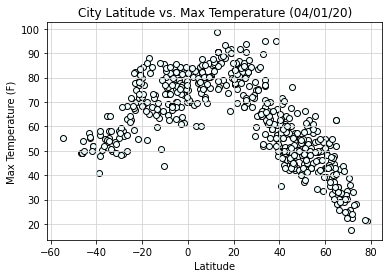

In [19]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="azure")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat vs. Temp Plot.png")
plt.show()

## Latitude vs. Humidity Plot

Latitude vs. Humidity Plot Observations

This scatter plot maps city latitudes versus humidity. Again the cities are selected randomly. There seems to be no correlation at all here.

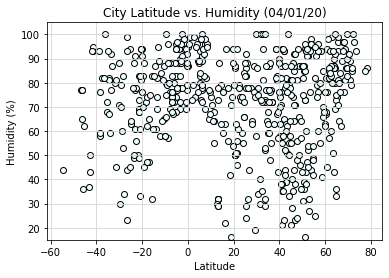

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="azure")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

Latitude vs. Cloudiness Plot Observations

This scatter plot shows cities' cloudiness against their latitude. The cities are selected randomly again. There is no particular correlation between cloudiness and latitude. You can see though that the cloudiness percentages seem to be located around the 10s lines.

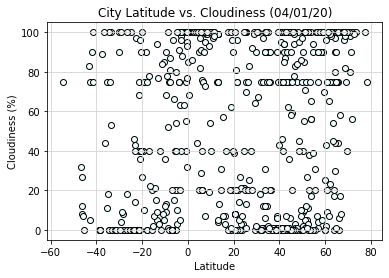

In [16]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="azure")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

Latitude vs. Wind Speed Observations

This scatter plot shows cities' latitudes versus wind speed. The cities are selected randomly. There is no particular correlation in the data.

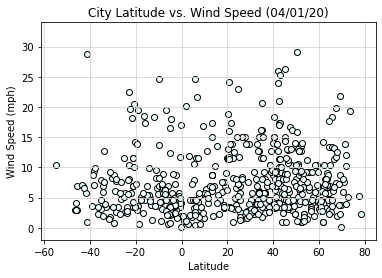

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="azure")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat vs. Wind Speed PLot.png")
plt.show()

## Linear Regression

In [20]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [24]:
# Defining the Northern and Southern Hemispheres dataframes
northern_df = weather_df.loc[weather_df["Lat"] > 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8683160553557836
y = -0.8x + 91.54


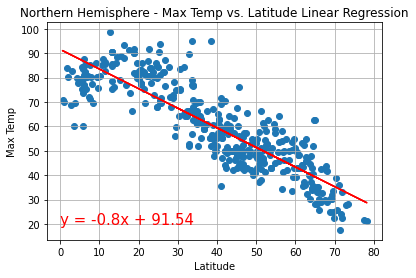

In [28]:
# Set variables
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
# # Equation placements
regEQplotX = 0
regEQplotY = 20
# Label for y axis
y_label = "Max Temp"
# Label the title
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Running function on variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
# Output the file
plt.savefig(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.6853578824372748
y = 0.58x + 78.57


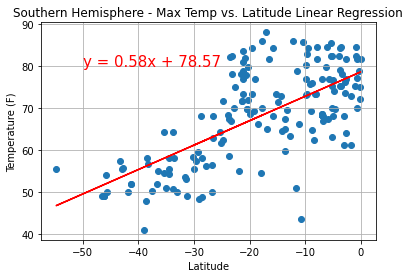

In [30]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
regEQplotX = -50
regEQplotY = 80
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.09605366188731951
y = 0.12x + 64.43


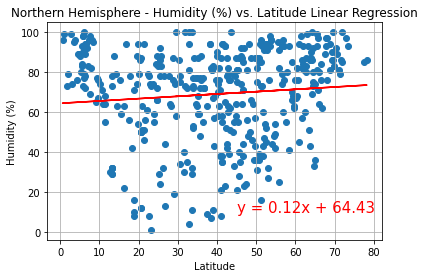

In [32]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
regEQplotX = 45
regEQplotY = 10
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.31023808571102385
y = 0.39x + 81.68


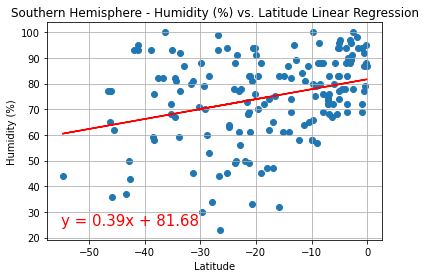

In [36]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
regEQplotX = -55
regEQplotY = 25
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression